In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
class DarBaby:
    def __init__(self, genome):
        self.genome = genome
    
    # decimal luminacity value
    def get_color(self):
        return sum(2**i if self.genome[-i-1] == 1 else 0 for i in range(len(self.genome)))
    
    def flip_genome_bit(self, bit_index):
        self.genome[bit_index] = np.abs(self.genome[bit_index]-1)
    
    def __repr__(self):
        return "DarBaby[genome={}][color={}]".format(''.join(list(map(str, self.genome))), self.get_color())

In [127]:
# 50% chance of getting one random mutation
class DarBabiesEvo:
    def __init__(self, n_babies=16, n_bits=8, hunt_kill=0.25, random_kill=0.25, background_color=0, initial_genome=[1]*4+[0]*4):
        self.n_babies = n_babies
        self.n_bits = n_bits
        self.hunt_kill = hunt_kill
        self.random_kill = random_kill
        self.background_color = background_color
        self.epsilon = np.finfo(float).eps
        self.initial_genome = initial_genome
        self.best_individual = None
        self.history = {'mean_fitness': [], 'mean_color': [], 'std_color': [], 'best_fitness': [], 'best_color': []}
    
    def mutate_darbaby(self, darbaby):
        darbaby.flip_genome_bit(np.random.randint(0, self.n_bits))
    
    # center cross-over
    def mate_darbabies(self, darbaby_a, darbaby_b):
        child = DarBaby(darbaby_a.genome[:int(self.n_bits/2)]+darbaby_b.genome[int(self.n_bits/2):])
        return child
    
    def get_darbaby_fitness(self, darbaby):
        return 255-np.abs(self.background_color-darbaby.get_color())
    
    def get_population_mean_color(self, population):
        return np.mean([darbaby.get_color() for darbaby in population])
    
    def get_population_mean_fitness(self, population):
        return np.mean([self.get_darbaby_fitness(darbaby) for darbaby in population])
    
    def get_population_std_color(self, population):
        return np.std([darbaby.get_color() for darbaby in population])
    
    def evolve(self, n_generations):
        population = [DarBaby(self.initial_genome) for _ in range(self.n_babies)]
        for g in range(n_generations):
            # hunt kill
            n_hunt = int(self.hunt_kill*self.n_babies)
            population = list(sorted(population, key=self.get_darbaby_fitness))[n_hunt:]
            
            # random kill
            n_random = int(self.random_kill*self.n_babies)
            population = list(np.random.choice(population, replace=False, size=len(population)-n_random))
            
            # mate
            new_population = []
            for _ in range(self.n_babies):
                darbaby_a, darbaby_b = np.random.choice(population, replace=False, size=2)
                child = self.mate_darbabies(darbaby_a, darbaby_b)
                # 50% chance of mutation
                if np.random.choice([False, True]):
                    self.mutate_darbaby(child)
                new_population.append(child)
            
            print(len(population), len(new_population))
            population = new_population
            mean_fitness = self.get_population_mean_fitness(population)
            mean_color = self.get_population_mean_color(population)
            std_color = self.get_population_std_color(population)
            
            best_local_individual = list(sorted(population, key=self.get_darbaby_fitness))[-1]
            if self.best_individual is None or (self.get_darbaby_fitness(best_local_individual) > self.get_darbaby_fitness(self.best_individual)):
                print("Found a new best individual.")
                self.best_individual = best_local_individual
            
            self.history['mean_fitness'].append(mean_fitness)
            self.history['mean_color'].append(mean_color)
            self.history['std_color'].append(std_color)
            self.history['best_color'].append(best_local_individual.get_color())
            self.history['best_fitness'].append(self.get_darbaby_fitness(best_local_individual))
            print("Generation {} ended with mean fitness {} and mean color {}".format(g, mean_fitness, mean_color))
        return population
    
    def plot_history(self):
        plt.figure(figsize=(6, 10))
        
        plt.subplot(3, 1, 1)
        plt.plot(self.history['mean_fitness'], label='Population Mean Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Mean Fitness')
        plt.title('Mean Fitness History')
        plt.legend()
        
        plt.subplot(3, 1, 2)
        plt.plot(self.history['mean_color'], label='Population Mean Color')
        plt.plot(self.history['best_color'], label='Population Best Color')
        plt.xlabel('Generation')
        plt.ylabel('Color')
        plt.title('Mean Color History')
        plt.legend()
        
        plt.subplot(3, 1, 3)
        plt.plot(self.history['std_color'], label='Population Color Std')
        plt.xlabel('Generation')
        plt.ylabel('Population Color Std')
        plt.title('Color Std History')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [143]:
darbabies_evo = DarBabiesEvo(n_babies=32, hunt_kill=0.5, random_kill=0.0)
darbabies_evo.evolve(500)

16 32
Found a new best individual.
Generation 0 ended with mean fitness 36.53125 and mean color 218.46875
16 32
Found a new best individual.
Generation 1 ended with mean fitness 61.65625 and mean color 193.34375
16 32
Generation 2 ended with mean fitness 88.6875 and mean color 166.3125
16 32
Found a new best individual.
Generation 3 ended with mean fitness 109.875 and mean color 145.125
16 32
Generation 4 ended with mean fitness 138.25 and mean color 116.75
16 32
Generation 5 ended with mean fitness 172.90625 and mean color 82.09375
16 32
Found a new best individual.
Generation 6 ended with mean fitness 196.25 and mean color 58.75
16 32
Generation 7 ended with mean fitness 215.125 and mean color 39.875
16 32
Found a new best individual.
Generation 8 ended with mean fitness 228.40625 and mean color 26.59375
16 32
Generation 9 ended with mean fitness 228.53125 and mean color 26.46875
16 32
Generation 10 ended with mean fitness 233.09375 and mean color 21.90625
16 32
Generation 11 ended w

[DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000001][color=1],
 DarBaby[genome=01000000][color=64],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00100000][color=32],
 DarBaby[genome=10000000][color=128],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000100][color=4],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00100000][color=32],
 DarBaby[genome=01000000][color=64],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=10000000][color=128],
 DarBaby[genome=00100000][color=32],
 DarBaby[genome=00000100][color=4],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00100000][color=32],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00001000][color=8],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00000000][color=0],
 DarBaby[genome=00

In [144]:
darbabies_evo.best_individual

DarBaby[genome=00000000][color=0]

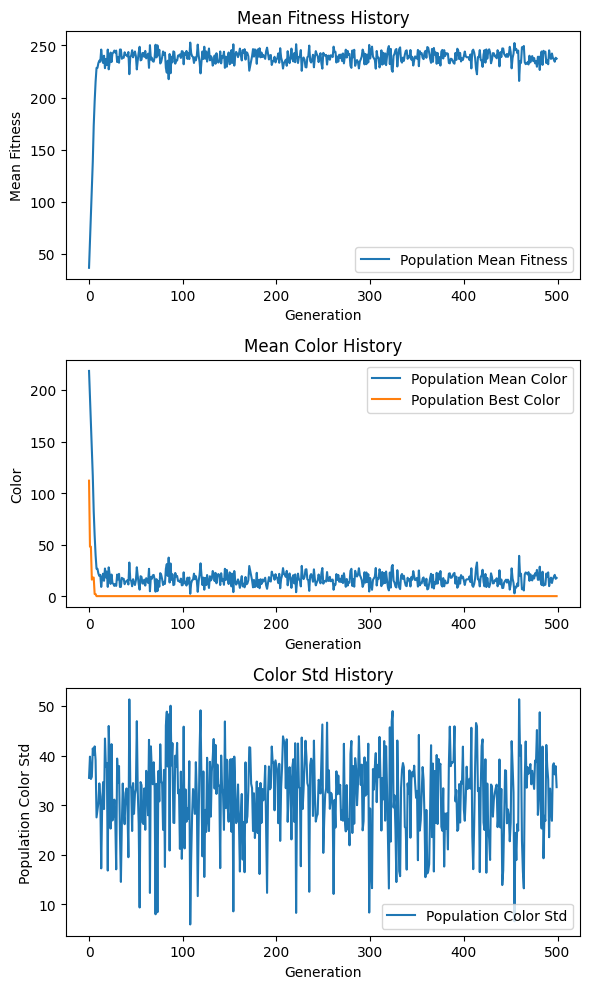

In [145]:
darbabies_evo.plot_history()